# NAMES: hesham ali ahmed, omar mohamed helmy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d = pd.read_csv('heart.csv')
d.shape

(303, 14)

In [4]:
class LogisticRegression:
    def __init__(self,learningrate, numepochs):
        self.eta = learningrate
        self.T = numepochs
    def fit(self,X,y):
        N, d = X.shape
        w = np.zeros(d)
        for t in range(self.T):
            grad = np.zeros(d)
            for i in range(N):
                grad += X[i]*(y[i]-(1/(1+np.exp(-np.sum(w*X[i])))))
            w = w + self.eta * grad
            if t%1000 == 0:
                L = 0
                for i in range(N):
                    L+=(y[i]-(1/(1+np.exp(-np.sum(w*X[i])))))
                print('t = {}, loss = {}'.format(t, L))
        self.w = w
    def predict(self,X):
        N, d = X.shape
        ypredict = np.zeros(N)
        for i in range(N):
            if np.sum(self.w*X[i])>0:
                ypredict[i] = 1
            else:
                ypredict[i] = 0
        return ypredict

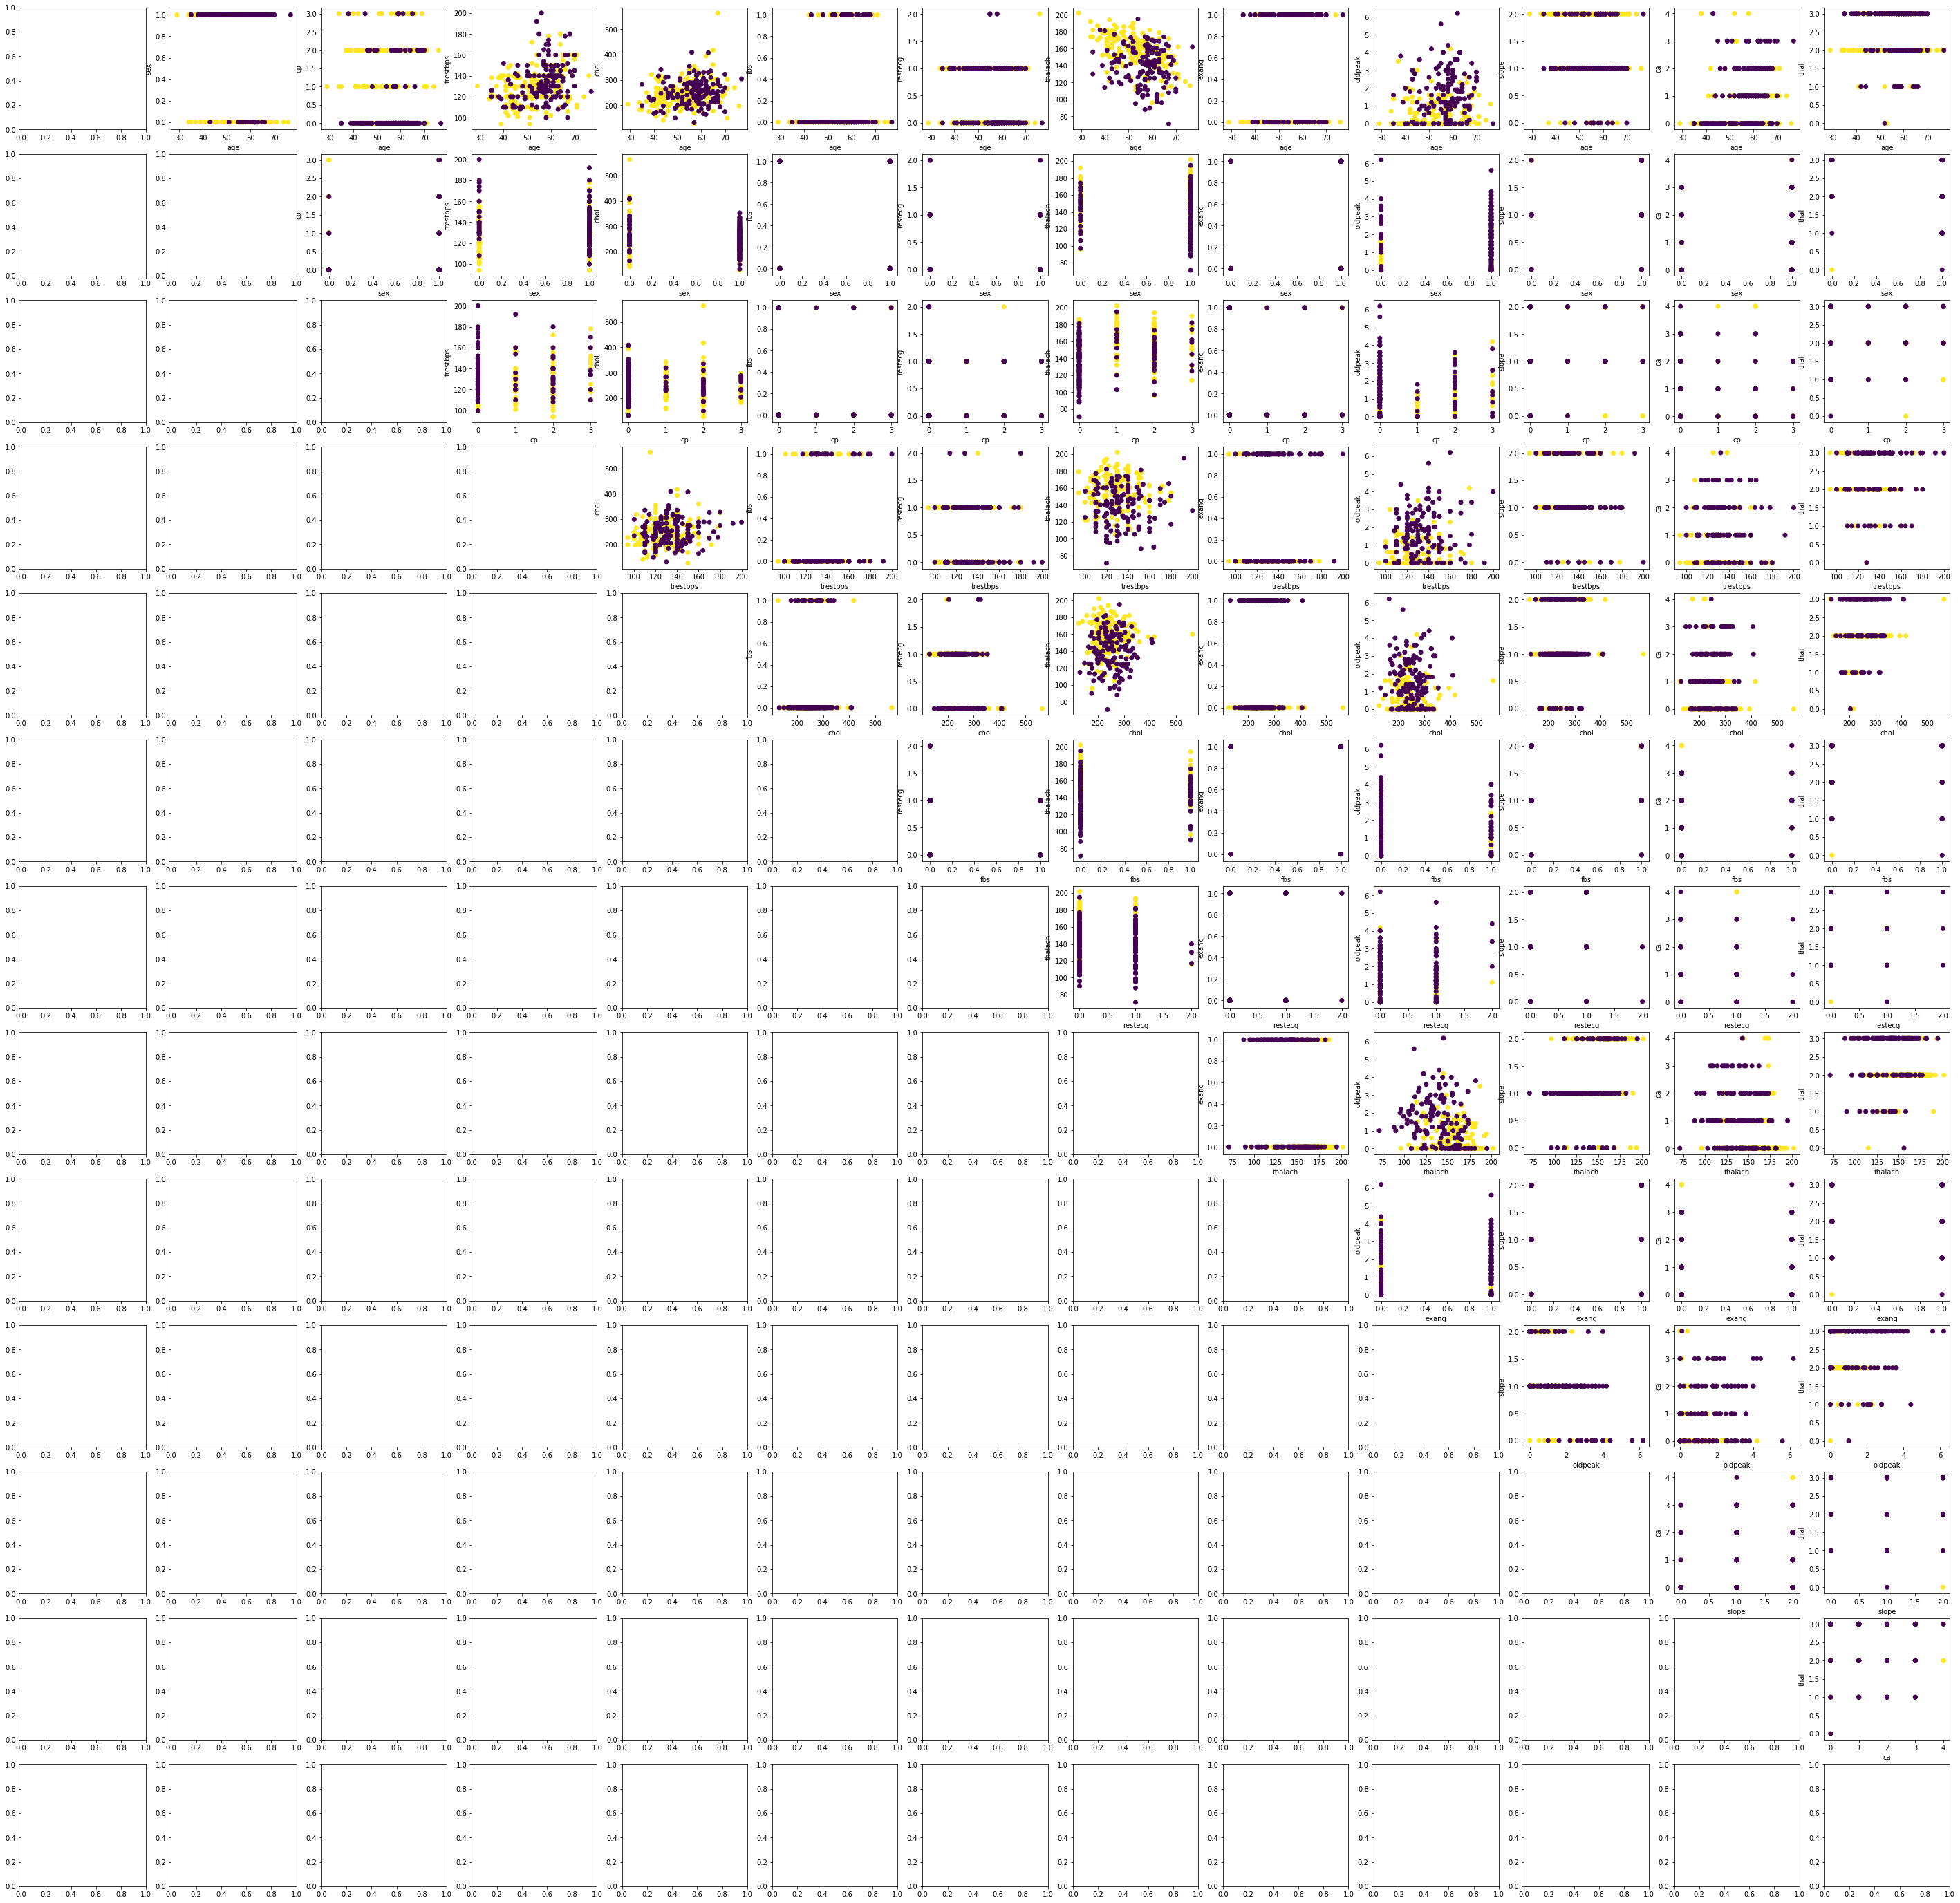

In [5]:
cols = list(d.columns)
cols.remove('target')
M = len(cols)
fig, ax = plt.subplots(M,M, figsize = (50,50))
k = 0
for i in range(M):
    for j in range(i+1, M):
        col1, col2 = cols[i], cols[j]
        ax[i][j].scatter(d[col1], d[col2], c = d['target'])
        ax[i][j].set_xlabel(col1)
        ax[i][j].set_ylabel(col2)

In [6]:
N = len(d)
testindices = np.random.choice(np.arange(N), size = int(0.3*N), replace = False)
trainindices = np.delete(np.arange(N), testindices)
X = d.drop(columns = 'target')
y = d['target']
Xtrain, ytrain = X.loc[trainindices], y[trainindices]
Xtest, ytest = X.loc[testindices], y[testindices]
ytrain = np.array(ytrain)
ytest = np.array(ytest)

In [7]:
def calculate(column1, column2):
    Xtrain_new = np.array(Xtrain[[column1, column2]])
    Xtest_new = np.array(Xtest[[column1, column2]])
    print('Training:')
    model = LogisticRegression(1e-6, 10000)
    model.fit(Xtrain_new, ytrain)
    train_accuracy = np.sum(model.predict(Xtrain_new) == ytrain)/len(ytrain)
    test_accuracy = np.sum(model.predict(Xtest_new) == ytest)/len(ytest)
    print('Column 1: {}, Column 2: {}, Train accuracy: {}, Test accuracy: {}'.format(column1, column2, train_accuracy, test_accuracy))

In [8]:
calculate('age', 'sex')

Training:
t = 0, loss = 7.767254102169133
t = 1000, loss = 4.00067609751197
t = 2000, loss = 4.013419171309246
t = 3000, loss = 4.025997528591632
t = 4000, loss = 4.038413137601068
t = 5000, loss = 4.050667954196625
t = 6000, loss = 4.062763921307188
t = 7000, loss = 4.074702968422434
t = 8000, loss = 4.086487011121105
t = 9000, loss = 4.0981179506349505
Column 1: age, Column 2: sex, Train accuracy: 0.5352112676056338, Test accuracy: 0.5555555555555556


In [9]:
calculate('cp', 'oldpeak')

Training:
t = 0, loss = 8.499487704999787
t = 1000, loss = 8.010940661116095
t = 2000, loss = 7.566108815113642
t = 3000, loss = 7.1605086752058655
t = 4000, loss = 6.790756902826253
t = 5000, loss = 6.454129409292425
t = 6000, loss = 6.148244540476296
t = 7000, loss = 5.870879605174737
t = 8000, loss = 5.619887812074688
t = 9000, loss = 5.393176306732966
Column 1: cp, Column 2: oldpeak, Train accuracy: 0.7887323943661971, Test accuracy: 0.7222222222222222


In [10]:
calculate('sex', 'cp')

Training:
t = 0, loss = 8.497242500003205
t = 1000, loss = 5.923201449725652
t = 2000, loss = 3.6934717097978886
t = 3000, loss = 1.771916265592125
t = 4000, loss = 0.12189134143646307
t = 5000, loss = -1.2912513319685
t = 6000, loss = -2.498960240271277
t = 7000, loss = -3.5290775476065988
t = 8000, loss = -4.405879853484171
t = 9000, loss = -5.150343260741574
Column 1: sex, Column 2: cp, Train accuracy: 0.7652582159624414, Test accuracy: 0.7444444444444445


In [11]:
calculate('cp', 'thal')

Training:
t = 0, loss = 8.497366875003168
t = 1000, loss = 6.311971665777446
t = 2000, loss = 4.839331818733497
t = 3000, loss = 3.8645959001565133
t = 4000, loss = 3.234867729551362
t = 5000, loss = 2.842635399704032
t = 6000, loss = 2.6128242303022677
t = 7000, loss = 2.493247731180198
t = 8000, loss = 2.447753790474066
t = 9000, loss = 2.451374168142189
Column 1: cp, Column 2: thal, Train accuracy: 0.7652582159624414, Test accuracy: 0.7444444444444445


In [12]:
calculate('oldpeak', 'slope')

Training:
t = 0, loss = 8.499843704998975
t = 1000, loss = 8.315914695562226
t = 2000, loss = 8.084525903256099
t = 3000, loss = 7.817500256986589
t = 4000, loss = 7.52601591423915
t = 5000, loss = 7.219886896607933
t = 6000, loss = 6.907260206487658
t = 7000, loss = 6.5945970386710435
t = 8000, loss = 6.286816516492
t = 9000, loss = 5.98751301855448
Column 1: oldpeak, Column 2: slope, Train accuracy: 0.7417840375586855, Test accuracy: 0.7


In [13]:
calculate('slope', 'ca')

Training:
t = 0, loss = 8.4988981250002
t = 1000, loss = 7.454235502875047
t = 2000, loss = 6.514513967728504
t = 3000, loss = 5.666870218255721
t = 4000, loss = 4.899982606452266
t = 5000, loss = 4.2039756527519785
t = 6000, loss = 3.5702886288635796
t = 7000, loss = 2.9915293918995003
t = 8000, loss = 2.4613275473191445
t = 9000, loss = 1.974195541709578
Column 1: slope, Column 2: ca, Train accuracy: 0.7276995305164319, Test accuracy: 0.7888888888888889


In [14]:
calculate('ca', 'thal')

Training:
t = 0, loss = 8.501788999998862
t = 1000, loss = 9.983998469265373
t = 2000, loss = 10.976170624768624
t = 3000, loss = 11.623260483090396
t = 4000, loss = 12.028804892037238
t = 5000, loss = 12.266273751915957
t = 6000, loss = 12.387601867412803
t = 7000, loss = 12.429404941446377
t = 8000, loss = 12.417440427873297
t = 9000, loss = 12.369784659634703
Column 1: ca, Column 2: thal, Train accuracy: 0.7370892018779343, Test accuracy: 0.7333333333333333


In [15]:
column1, column2 = 'cp', 'oldpeak'
Xtrain_new = np.array(Xtrain[[column1, column2]])
Xtest_new = np.array(Xtest[[column1, column2]])
lr = np.arange(1,11)*(5e-7)
trainacc = []
testacc = []
for i in range(10):
    model = LogisticRegression(lr[i], 10000)
    model.fit(Xtrain_new, ytrain)
    train_accuracy = np.sum(model.predict(Xtrain_new) == ytrain)/len(ytrain)
    test_accuracy = np.sum(model.predict(Xtest_new) == ytest)/len(ytest)   
    print('Learning rate: {}, train accuracy: {}, test accuracy: {}'.format(lr[i], train_accuracy, test_accuracy))
    trainacc.append(train_accuracy)
    testacc.append(test_accuracy)

t = 0, loss = 8.49974385250004
t = 1000, loss = 8.249663319489665
t = 2000, loss = 8.011184686361023
t = 3000, loss = 7.783610204073955
t = 4000, loss = 7.5663411310627255
t = 5000, loss = 7.358862920511156
t = 6000, loss = 7.1607294693003585
t = 7000, loss = 6.9715480880576
t = 8000, loss = 6.790966207571449
t = 9000, loss = 6.618660311730711
Learning rate: 5e-07, train accuracy: 0.784037558685446, test accuracy: 0.7222222222222222
t = 0, loss = 8.499487704999787
t = 1000, loss = 8.010940661116095
t = 2000, loss = 7.566108815113642
t = 3000, loss = 7.1605086752058655
t = 4000, loss = 6.790756902826253
t = 5000, loss = 6.454129409292425
t = 6000, loss = 6.148244540476296
t = 7000, loss = 5.870879605174737
t = 8000, loss = 5.619887812074688
t = 9000, loss = 5.393176306732966
Learning rate: 1e-06, train accuracy: 0.7887323943661971, test accuracy: 0.7222222222222222
t = 0, loss = 8.49923155749935
t = 1000, loss = 7.7831339367492305
t = 2000, loss = 7.160287881995313
t = 3000, loss = 6.61

In [16]:
column1, column2 = 'cp', 'oldpeak'
Xtrain_new = np.array(Xtrain[[column1, column2]])
Xtest_new = np.array(Xtest[[column1, column2]])
T = np.arange(1,11)*1000
trainacc = []
testacc = []
for i in range(10):
    model = LogisticRegression(1e-6, T[i])
    model.fit(Xtrain_new, ytrain)
    train_accuracy = np.sum(model.predict(Xtrain_new) == ytrain)/len(ytrain)
    test_accuracy = np.sum(model.predict(Xtest_new) == ytest)/len(ytest)   
    print('Number of epochs: {}, train accuracy: {}, test accuracy: {}'.format(T[i], train_accuracy, test_accuracy))
    trainacc.append(train_accuracy)
    testacc.append(test_accuracy)

t = 0, loss = 8.499487704999787
Number of epochs: 1000, train accuracy: 0.7793427230046949, test accuracy: 0.7222222222222222
t = 0, loss = 8.499487704999787
t = 1000, loss = 8.010940661116095
Number of epochs: 2000, train accuracy: 0.784037558685446, test accuracy: 0.7222222222222222
t = 0, loss = 8.499487704999787
t = 1000, loss = 8.010940661116095
t = 2000, loss = 7.566108815113642
Number of epochs: 3000, train accuracy: 0.784037558685446, test accuracy: 0.7222222222222222
t = 0, loss = 8.499487704999787
t = 1000, loss = 8.010940661116095
t = 2000, loss = 7.566108815113642
t = 3000, loss = 7.1605086752058655
Number of epochs: 4000, train accuracy: 0.784037558685446, test accuracy: 0.7222222222222222
t = 0, loss = 8.499487704999787
t = 1000, loss = 8.010940661116095
t = 2000, loss = 7.566108815113642
t = 3000, loss = 7.1605086752058655
t = 4000, loss = 6.790756902826253
Number of epochs: 5000, train accuracy: 0.784037558685446, test accuracy: 0.7222222222222222
t = 0, loss = 8.499487